# MATH 189 Final Project


## Statement of Project

Analyzing the wealth distribution among billionaires is vital for understanding broader economic inequalities that plague our current economy. This analysis extends insights to lower income groups, helping to evaluate the effectiveness of economic systems and policies in fostering equitable growth. By studying wealth accumulation dynamics, we hope to uncover patterns and barriers to wealth equality, aiding the understanding of our current economic climate and the creation of future inclusive economic strategies.

https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys

sys.path.append('D:/Documents/School/WI24/MATH189/MATH189Final/modules')
from data_cleaning import *


## Importing Dataset

In [2]:
### DEFINING parent directory, different for each person
data_dir = 'D:/Documents/School/WI24/MATH189/FinalData'

### Billionaires Data
billionaires = pd.read_csv(data_dir + '/billionaires.csv')

### EdStats Data
ed_stats_country = pd.read_csv(data_dir+'/EdStatsCountry.csv', usecols=lambda column : column != 'Unnamed: 31')

### world country data

country_df = pd.read_csv(data_dir + '/world-data-2023.csv')


## Cleaning

In [3]:
df_merged= merge_billionaires_ed_stats(billionaires, ed_stats_country, country_df)

## EDA

#### Data Cleaning

In [4]:
df = clean_and_prepare_df(df_merged)

# Proof of cleaned data
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values
df.shape

D:\Documents/School/WI24/MATH189/MATH189Final/modules\data_cleaning.py:68: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('%', '').str.replace(',', '').str.replace('$','').str.replace(' ','').astype(float)


(2640, 96)

### Exploration

<Axes: xlabel='country'>

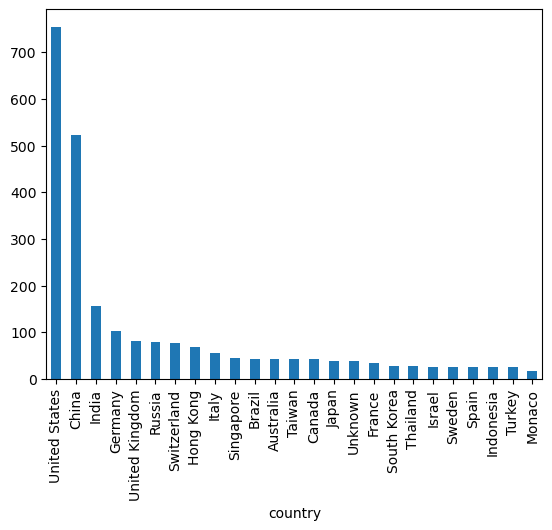

In [5]:
## Plotting Distribution of Billionaires by top countries
df.groupby('country')['personName'].count().sort_values(ascending=False).iloc[:25].plot(kind='bar')